## Машинное обучение – весна 2024
## Домашнее задание 1: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
np.isnan(y).sum()

0

Мы видим, что ни в признаках, ни в таргете нет пропущенных значений, так что можно ничего не удалять.


In [6]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Судя по описанию переменных на сайте и выдаче дескрайба в данных нет категориальных признаков. В описании переменных [вот тут](https://rdrr.io/cran/rattle.data/man/wine.html) есть мистическая переменная Type, но в наших данных ее нет или она в таргете

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# кажется, что можно зафиксировать random_state в аргументах функции, а не np.random, но я перестраховался 

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # иначе не посчитаем долю правильных ответов 

In [9]:
# Сначала масштабируем признаки:

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_new = scaler.transform(X_test[['alcohol', 'magnesium']])

In [10]:
# Посмотрим, вышло или нет:
pd.DataFrame(X_test_new).describe()
# у всех признаков стандартное отклонение близко к 1, так что, кажется, да, вышло 

,0,1
count,54.000000,54.000000
mean,0.146751,-0.244975
std,0.882444,0.725238
min,-1.853395,-1.494846
25%,-0.648270,-0.776140
50%,0.276455,-0.286113
75%,0.792511,0.073241
max,1.642662,1.445316


In [11]:
NN = [1, 3, 5, 10, 15, 25] # список с числом соседей
print('NN  ' + '  Train  '+ '  Test')
for i in NN:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_new, y_train)
    y_train_pred = knn.predict(X_train_new)
    y_test_pred = knn.predict(X_test_new)
    print(f'{i}     {round(accuracy_score(y_train_pred, y_train), 2)}     {round(accuracy_score(y_test_pred, y_test), 2)}')

# простите за кривые пробелы, но я не умею в красивое автоматическое форматирование выводов 


NN    Train    Test
1     0.99     0.67
3     0.84     0.65
5     0.81     0.69
10     0.81     0.7
15     0.78     0.69
25     0.73     0.69


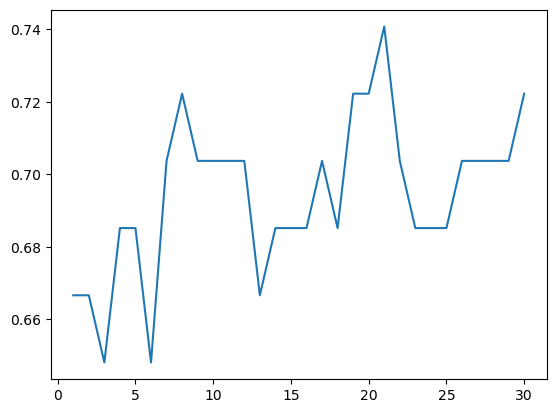

In [12]:
# это для душевного удовлетворения - как меняется accuracy на тестовой выборке в зависимости от числа соседей 

import matplotlib.pyplot as plt

nn = range(1, 31)
accuracies = []
for i in nn:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_new, y_train)
    y_test_pred = knn.predict(X_test_new)
    accuracy = accuracy_score(y_test_pred, y_test)
    accuracies.append(accuracy)

plt.plot(nn, accuracies)

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

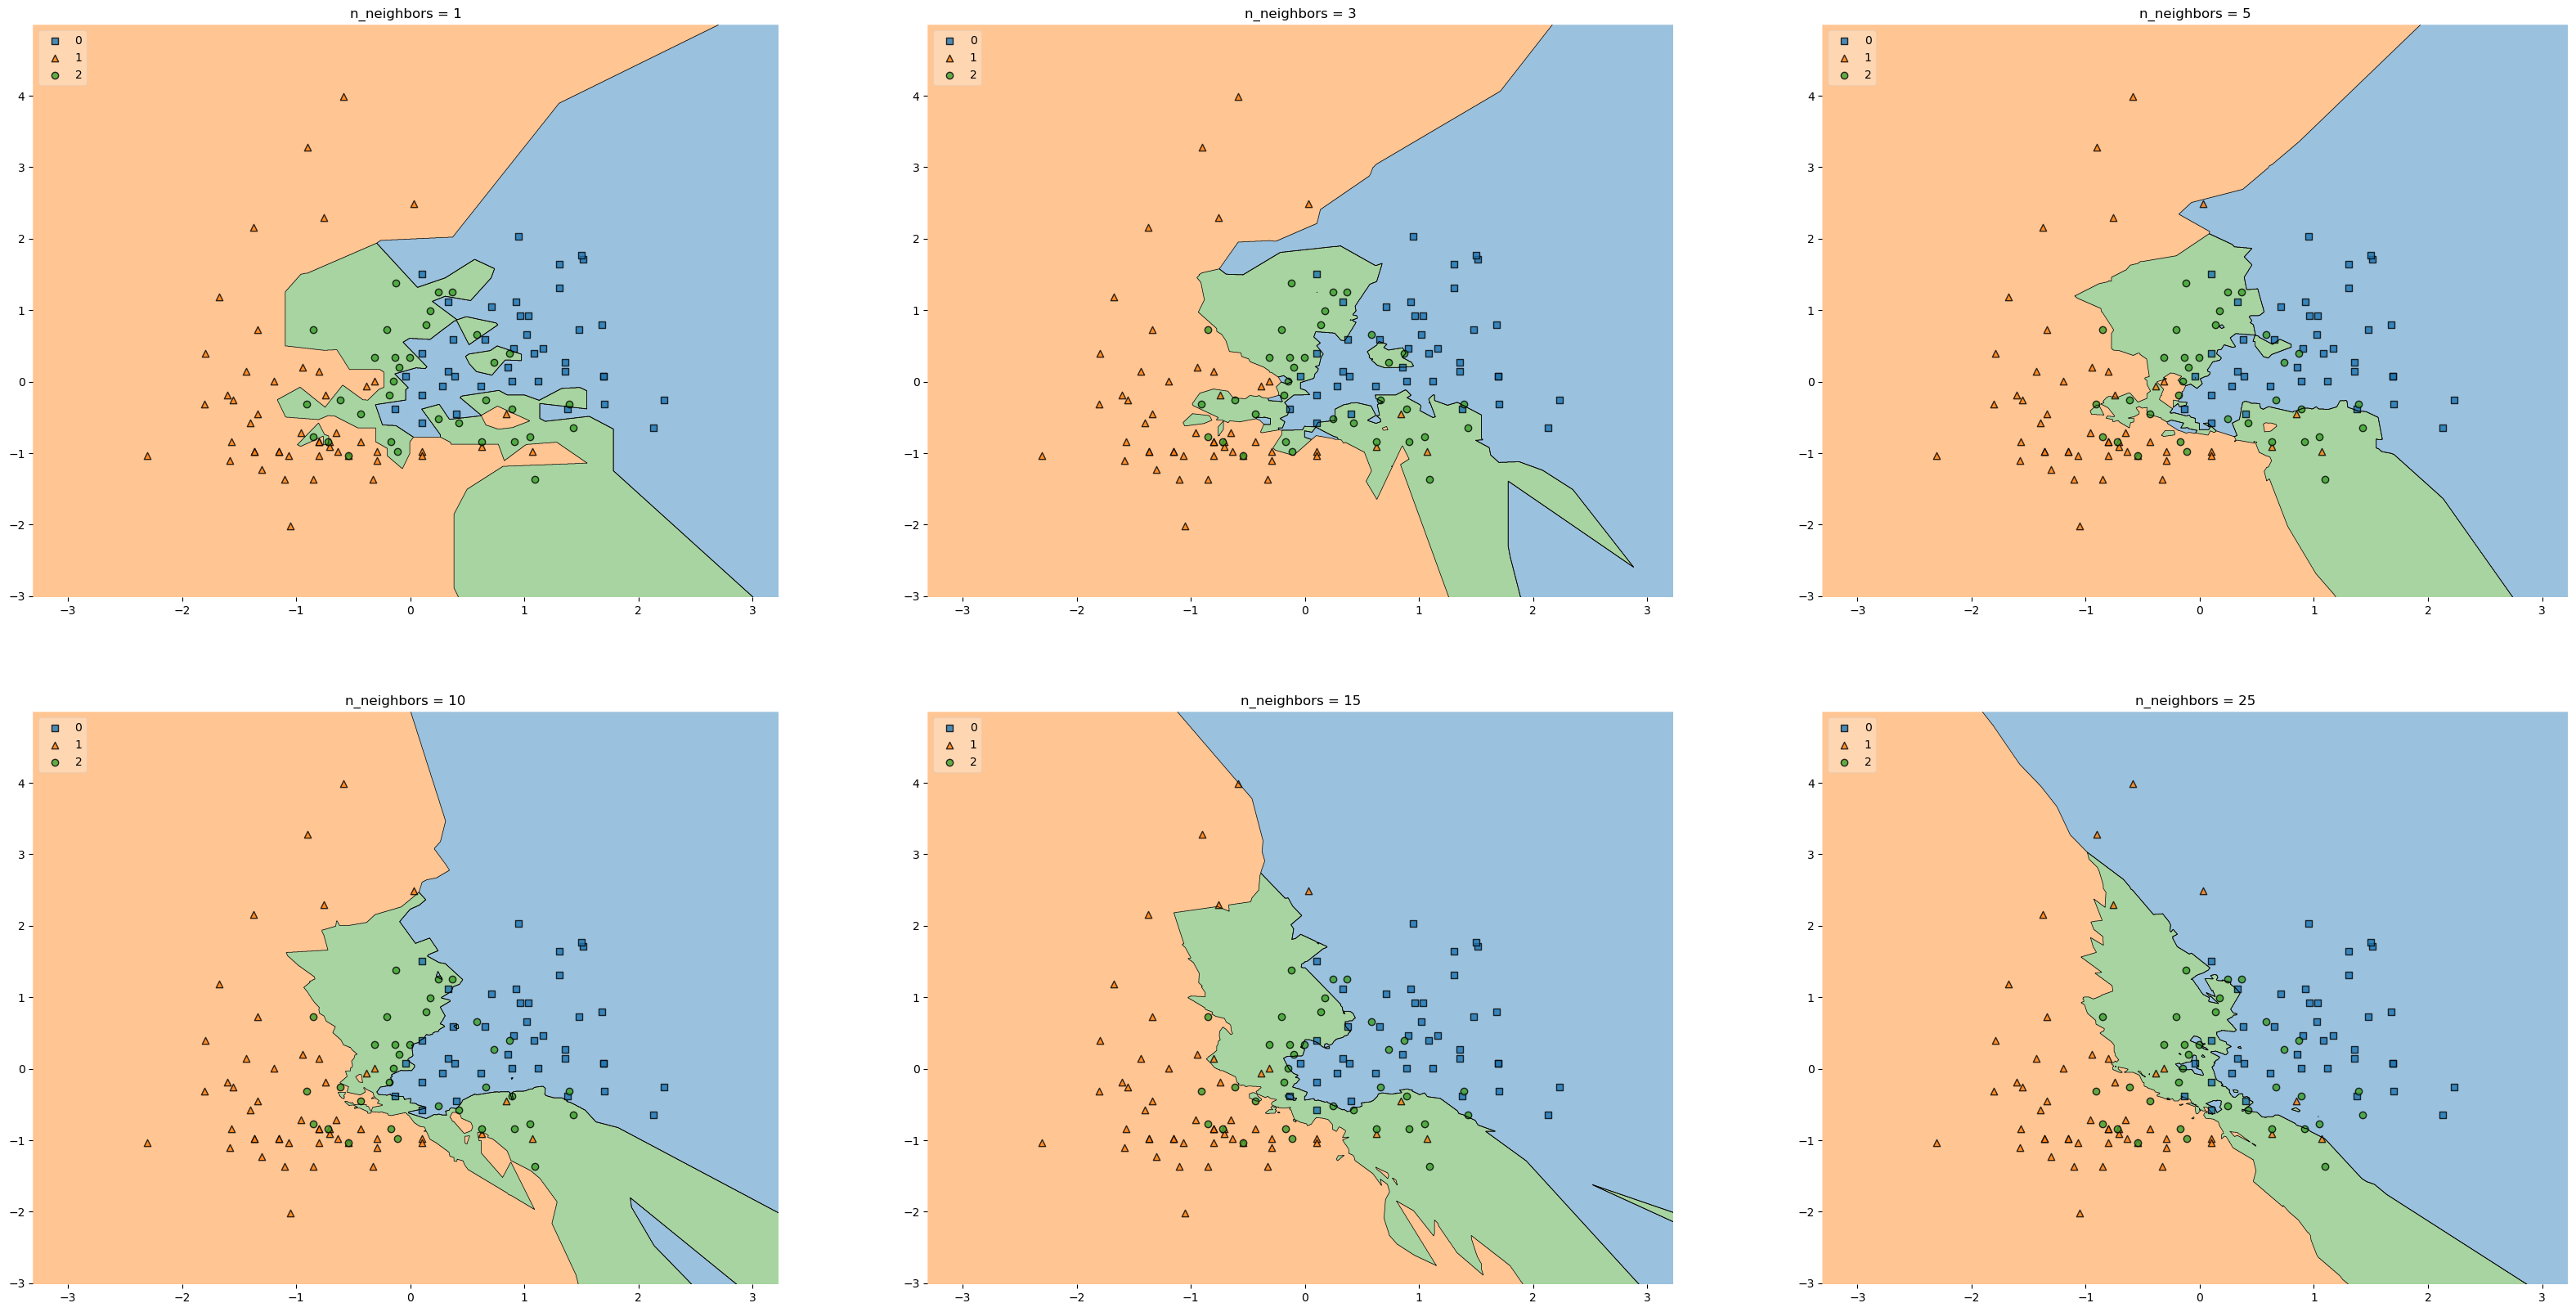

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

clf1 = KNeighborsClassifier(n_neighbors = 1)
clf3 = KNeighborsClassifier(n_neighbors = 3)
clf5 = KNeighborsClassifier(n_neighbors = 5)
clf10 = KNeighborsClassifier(n_neighbors = 10)
clf15 = KNeighborsClassifier(n_neighbors = 15)
clf25 = KNeighborsClassifier(n_neighbors = 25)

gs = gridspec.GridSpec(2, 3) # Решетка для отображения графиков 

fig = plt.figure(figsize=(40, 20)) # fig для отображения графиков 

labels = [f'n_neighbors = {i}' for i in [1, 3, 5, 10, 15, 25]] # заголовки классификаторов 

for clf, lab, grd in zip([clf1, clf3, clf5, clf10, clf15, clf25],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)): # если честно, то работу итертулс я так до конца и не понял, поэтому список [0, 1, 2] был получен перебором

    clf.fit(X_train_new, y_train) # обучили
    
    ax = plt.subplot(gs[grd[0], grd[1]]) # добавили график 
    
    fig = plot_decision_regions(X=X_train_new, y=y_train, clf=clf, legend=2) # построили график
    
    plt.title(lab) # заголовок 

plt.show() # вывод 


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [16]:
# Оптимальными выглядят 5, 10 или 15соседей.  Они дают лучший показатель аккараси на тесте + решающая поверхность выглядит не слишком дискриминирующей в отношении y = 2. 
# Чтобы выбрать конкретное число соседей я бы посмотрел так же на другие метрики качества

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

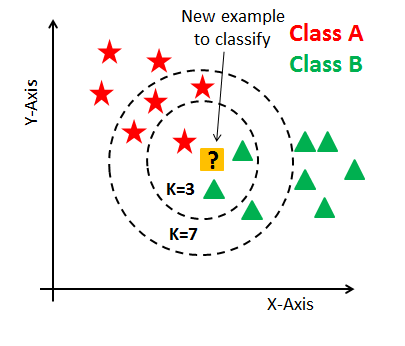

In [17]:
import numpy as np
from collections import Counter 
from sklearn.base import BaseEstimator

class KNN(BaseEstimator):
    def __init__(self, k:int,  metric='euclidean', p=2): # запомним здесь выбранную метрику и параметр для Минковского 
        self.k = k
        self.metric = metric
        self.p = p
    
    def fit(self, X, y): # так как по сути на этапе обучения достаточно просто запомнить все наблюдения обучающей выборки 
        self.X_train = X
        self.y_train = y
    
    def predict(self, X, distance = 'euclidean'):
        predictions = []
        for x in X:
            if distance == 'euclidean':
                distances = np.linalg.norm(self.X_train - x, axis=1) 
            elif distance == 'cityblock':
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            elif self.metric == 'minkowski':
                try:
                    distances = np.power(np.sum(np.power(np.abs(self.X_train - x), self.p), axis=1), 1/self.p) 
                except:
                    raise ValueError('Seems like you have problems with parameter p for Minkowski')
            else:
                raise ValueError('Choose Euclidean, Cityblock or Minkowski metric')
            indices_of_nearest_neighbors = np.argsort(distances)[:self.k] # отсортировали расстояния между тестовым объектом и объектом из обучающей выборки + извекли индексы k ближайших
            ys_of_nearest_neighbors = self.y_train[indices_of_nearest_neighbors] # ищем метки классов для ближайших соседей, найденных в предыдущей строчке 
            most_common = Counter(ys_of_nearest_neighbors).most_common(1) # вернул нам наиболее часто встречающийся элемент в виде кортежа 
            predictions.append(most_common[0][0]) # вернули класс наиболее часто встречающегося в предыдущей строчке 
        return np.array(predictions)

In [18]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [19]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия своими руками.

В этом задании мы попробуем реализовать алгоритм линейной регрессии своими руками и рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [20]:
# data = pd.read_csv('data/diamonds.csv') вот так у меня не открылось 
data = pd.read_csv('https://raw.githubusercontent.com/ChrisG60/Diams/master/diamonds.csv') # поэтому я нашел тот же файл у кого-то на гитхабе
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


У нас есть бесполезный столбец с id - удалим его 

In [21]:
data = data.drop(columns = 'Unnamed: 0')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Мы будем решать задачу на примере предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.0 (2 балла)** Реализуйте алгоритм линейной регресии (базовой, без регуляризации)

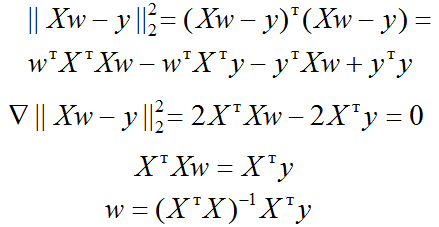

Гугл, лекции и учебник по регрессионному анализу говорят, что вектор весов можно выписать в явном виде так, как указано выше. Реализуем это знание 

In [22]:
import numpy as np
from sklearn.base import BaseEstimator

class Linreg(BaseEstimator):    
    def fit(self, X, y):
      # сначала надо добавить единицы для того, чтобы получить оценку свободного коэффициента 
      X_new = np.c_[np.ones((X.shape[0], 1)), X]
      self.w = (np.linalg.inv((X_new.T).dot(X_new))).dot(X_new.T).dot(y)
    def predict(self, X):
      # сначала снова нужно добавить единицы
      X_new = np.c_[np.ones((X.shape[0], 1)), X]
      return X_new.dot(self.w) # так как для поиска предикта можно воспользоваться обычным матричным умножением


Главная проблема реализованного выше способа - то, что нампай использует численные методы, а не символьные, поэтому точность перемножения матриц будет не самой высокой. Тем не менее, кажется, что в sklearn реализация линейной регрессии достаточно похожа на приведенную выше, так что должно работать с адекватной точностью 

In [23]:
'''
кажется тут произошел непонятный дубль 
import numpy as np
from sklearn.base import BaseEstimator

class Linreg(BaseEstimator):    
    def fit(self, X, y):
      # YOUR CODE HERE
      pass
    
    def predict(self, X):
      # YOUR CODE HERE
      pass
      '''

'\nкажется тут произошел непонятный дубль \nimport numpy as np\nfrom sklearn.base import BaseEstimator\n\nclass Linreg(BaseEstimator):    \n    def fit(self, X, y):\n      # YOUR CODE HERE\n      pass\n    \n    def predict(self, X):\n      # YOUR CODE HERE\n      pass\n      '

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [24]:
data.isna().sum() # видим, что пропущенных значений нет 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [25]:
# Признак 'Unnamed: 0' я уже удалил выше, а все остальные столбцы выглядят осмысленными 

**Задача 3.3 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [26]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [27]:
corr_matrix['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

Видим, что больше всего с ценой коррелируют параметры размеров: вес в каратах и x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [28]:
data = pd.get_dummies(data, drop_first = True, dtype = float)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.5 (0.1 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['price']), data['price'], test_size = 0.3, random_state = 42)
# кажется, что можно зафиксировать random_state в аргументах функции, а не np.random, но я перестраховался 

In [30]:
X_train 

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31229,0.31,62.0,56.0,4.38,4.36,2.71,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278,0.81,62.6,55.0,5.92,5.96,3.72,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6646,0.79,61.7,56.0,5.94,5.95,3.67,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44732,0.47,61.0,55.0,5.03,5.01,3.06,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38158,0.33,60.3,58.0,4.49,4.46,2.70,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.90,62.8,59.0,6.13,6.03,3.82,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Задача 3.6 (0.1 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

**Задача 3.7 (0.1 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [32]:
# Подход 1: самим реализовать функцию для нахождения среднеквадратичной ошибки, использовать линейную регрессию, которую мы создали в задании 3.0
def mse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    mse = np.mean(se)
    return mse
my_linear_regression = Linreg()
my_linear_regression.fit(X_train_new, y_train)
y_pred_train = my_linear_regression.predict(X_train_new)
y_pred_test = my_linear_regression.predict(X_test_new)
print(f'For train MSE = {mse(y_train, y_pred_train)}, for test MSE = {mse(y_test, y_pred_test)}')

For train MSE = 1290541.9147450612, for test MSE = 1244765.4357158707


In [33]:
# Подход 2: использовать среднеквардатичную ошибку из sklearn, использовать регрессию из задания 3.0
from sklearn.metrics import mean_squared_error as MSE1
print(f'For train MSE = {MSE1(y_train, y_pred_train)}, for test MSE = {MSE1(y_test, y_pred_test)}')


For train MSE = 1290541.9147450612, for test MSE = 1244765.4357158707


In [34]:
# Подход 3: использовать все из sklearn 
from sklearn.linear_model import LinearRegression as LR 
lr = LR()
lr.fit(X_train_new, y_train)
y_pred_train = lr.predict(X_train_new)
y_pred_test = lr.predict(X_test_new)
print(f'For train MSE = {MSE1(y_train, y_pred_train)}, for test MSE = {MSE1(y_test, y_pred_test)}')


For train MSE = 1290541.914745061, for test MSE = 1244765.4357158763


In [35]:
# А еще красивую выдачу со статистическими значимостями и заранее найденными статтестами и метриками качества можно получить из пакета statsmodels
import statsmodels.api as sm
x = sm.add_constant(X_train_new)

model = sm.OLS(y_train, x).fit()

print(model.summary())
# и

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:08:59   Log-Likelihood:            -3.1921e+05
No. Observations:               37758   AIC:                         6.385e+05
Df Residuals:                   37734   BIC:                         6.387e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3951.4953      5.848    675.681      0.0

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [36]:
lr.intercept_

3951.4953122517086

In [37]:
lr.coef_

array([ 5338.61567061,   -90.17381703,   -60.33227991, -1100.41885004,
          -6.45891672,   -34.25894462,   170.60293265,   414.36951486,
         339.23920411,   310.65425625,   -83.64002086,  -104.56099268,
        -202.86356354,  -362.00229958,  -442.78356742,  -529.44921589,
         975.93364117,  1611.5716809 ,  1042.92121499,  1670.31849636,
        1817.66420828,  1284.80947523,  1461.03419387])

Самые высокие оценки коэффициентов при вещественных переменных по модулю у интерсепта, веса в каратах, параметра х. Самые высокие оценки коэффициентов при категориальных переменных у параметра clarity

**Задача 3.9 (0.2 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [38]:
from sklearn.linear_model import Lasso, Ridge 
lasso, ridge = Lasso(alpha=10), Ridge(alpha = 10)
lasso.fit(X_train_new, y_train)
ridge.fit(X_train_new, y_train)
print(lasso.coef_)
print(ridge.coef_)



[4831.59626086  -96.51685344  -71.93794363 -651.18519277   -0.
  -28.49475941   46.13596549  206.83767582  151.39127079  139.24149436
  -12.10568106  -37.37333901 -123.6378664  -285.767992   -368.87614678
 -469.2676605   661.82943428  875.5658754   408.43340368 1047.87685969
 1099.90885795  848.81716871  959.29856886]
[ 5299.36046068   -88.38302464   -60.57679601 -1057.32175599
    -9.14802499   -37.56886358   171.20336413   415.48016859
   340.21593369   312.01606582   -83.21928024  -104.38686434
  -202.29344358  -360.99775436  -441.42772206  -528.13069178
   963.39852302  1580.72064771  1016.7986878   1644.55161501
  1787.75171653  1267.17953038  1440.49036818]


ДА, веса сильно уменьшились. Мультиколлинеарность сильно свойственна для изначальной модели регрессии, так как, во-первых, сильно снизились оценки коэффициентов; во-вторых, мы видели это на этапе разведывательного анализа данных - внизу хитмэп корреляционной матрицы, по нему мы видим высокие корреляции между весом в каратах и параметрами размера  

<Axes: >

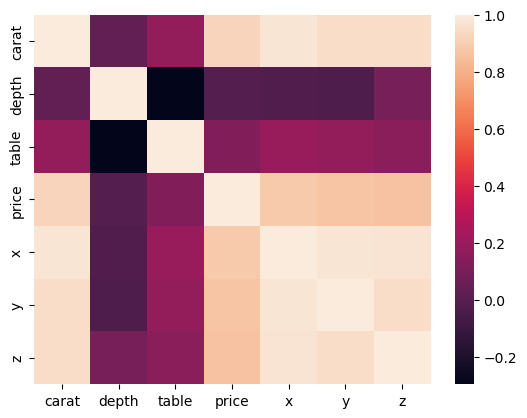

In [39]:
from seaborn import heatmap
heatmap(corr_matrix)

**Задача 3.10 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [40]:
alphas = [0.1, 1, 10, 100, 200]
weights_norm_lasso = []
weights_norm_ridge = []
for a in alphas:
    lasso, ridge = Lasso(alpha=a), Ridge(alpha = a)
    lasso.fit(X_train_new, y_train)
    ridge.fit(X_train_new, y_train)
    weights_norm_lasso.append(np.linalg.norm(lasso.coef_))
    weights_norm_ridge.append(np.linalg.norm(ridge.coef_))

results_as_df = pd.DataFrame()
results_as_df['alpha'] = alphas
results_as_df['Lasso_norm_weights'] = weights_norm_lasso
results_as_df['Ridge_norm_weights'] = weights_norm_ridge


In [41]:
import plotly.express as px
fig = px.line(results_as_df, x='alpha', y = ['Ridge_norm_weights', 'Lasso_norm_weights'])
fig.show()


Мы видим, что Лассо-регрессия агрессивнее уменьшает веса при росте параметра альфа (судя по всему, квадратично). Кажется, что из-за более агрессивного уменьшения признаков Лассо способна занулить заименее информативные признаки, так что можно оставлять только признаки с более высокими коэффициентами  

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [43]:
from sklearn.linear_model import LassoCV 
list_of_alphas = [i/10 for i in range(1, 10000)]
Lassocv = LassoCV(alphas = list_of_alphas, cv = 5, max_iter = 1000000000) # иначе оно не сходилось 
Lassocv.fit(X_train_new, y_train)
result = pd.concat([pd.DataFrame(Lassocv.alphas_, columns = ['alpha']), pd.DataFrame(Lassocv.mse_path_, columns = ['MSE1', 'MSE2', 'MSE3', 'MSE4', 'MSE5'])], axis = 1)
result['meanMSE'] = result[['MSE1', 'MSE2', 'MSE3', 'MSE4', 'MSE5']].mean(axis = 1)
result.sort_values('meanMSE', ascending = True)

,alpha,MSE1,MSE2,MSE3,MSE4,MSE5,meanMSE
9995,0.4,1.334010e+06,1.293430e+06,1.336916e+06,1.258319e+06,1.245904e+06,1.293716e+06
9994,0.5,1.334093e+06,1.293535e+06,1.336761e+06,1.258193e+06,1.246103e+06,1.293737e+06
9993,0.6,1.334189e+06,1.293652e+06,1.336774e+06,1.258079e+06,1.246313e+06,1.293801e+06
9992,0.7,1.334297e+06,1.293780e+06,1.336802e+06,1.257978e+06,1.246532e+06,1.293878e+06
9991,0.8,1.334418e+06,1.293920e+06,1.336843e+06,1.257889e+06,1.246764e+06,1.293967e+06
...,...,...,...,...,...,...,...
4,999.5,3.489573e+06,3.441790e+06,3.388544e+06,3.347422e+06,3.399501e+06,3.413366e+06
3,999.6,3.489774e+06,3.441988e+06,3.388742e+06,3.347621e+06,3.399704e+06,3.413566e+06
2,999.7,3.489976e+06,3.442186e+06,3.388939e+06,3.347821e+06,3.399907e+06,3.413766e+06
1,999.8,3.490177e+06,3.442384e+06,3.389137e+06,3.348020e+06,3.400110e+06,3.413966e+06


Выберем alpha = 0.4

**Задача 3.12 (0.1 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [44]:
lasso = Lasso(alpha = 0.4)
lasso.fit(X_train_new, y_train)
lasso.coef_

array([ 5.31826457e+03, -9.03933052e+01, -6.07841574e+01, -1.08379801e+03,
       -4.60822254e+00, -3.41819260e+01,  1.65653565e+02,  4.06134645e+02,
        3.31797625e+02,  3.03839473e+02, -8.07802844e+01, -1.01876272e+02,
       -1.99695390e+02, -3.58955536e+02, -4.39825965e+02, -5.27040230e+02,
        9.63171856e+02,  1.58167014e+03,  1.01714350e+03,  1.64503696e+03,
        1.78851011e+03,  1.26710011e+03,  1.44065560e+03])

наиболее информативны показатели веса в каратах, размера по х и параметры чистоты алмаза.

С весом все кажется интуитивным - чем больше алмаз весит, тем он дороже. Аналогично с чистотой - чем чище алмаз, тем он дороже.

С иксом все не так тривиально. Однако, заметим, что алмазы в основном имеют достаточно определенную и строгую пропорцию между измерениями по осям, так что на самом деле х можно рассматривать как параметр объема. Поэтому чем объемнее алмаз, тем он дороже 

(вообще выглядит разумной замена признаков веса и размеров по параметрам на плотность, рассчитанную как отношение массы к объему, и объема как хотя бы произведения x, y и z. Тогда наиболее плотные и объемные алмазы будут весить больше)

Наименее информативным оказался признаки y и z (по причине выше - все 'отъел' х) и какой-то из параметров цвета алмаза 

**Задача 3.13 (0.2 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [45]:
y_pred_lasso = lasso.predict(X_test_new)
MSE1(y_test, y_pred_lasso)

1244289.514980796

Вспомним, что для обычной регрессии MSE на тесте была 1244765.4357158763, так что изменения в качестве не такие сильные и модели почти одинаково объясняют разброс y. Тем не менее, лассо дала немного более оптимальные метрики качества - возможно, из-за лучшей подгонки из-за штрафов и решения мультиколлинеарности (хотя в общем случае это не обязательно дает улучшение качества)